In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import folium as fo
import plotly as ply
import plotly.graph_objects as go
import matplotlib

from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib

In [3]:
all_ret=pd.read_excel("power_all_capacity_20240826.xlsx", sheet_name = 'annualPrematureRet_GW')

In [ ]:
scenarios=all_ret['scenario']

# this is where we add all
sce=scenarios.drop_duplicates()
sce[0]


scenario_dataframes = {}

for scenario in sce:

    scenario_dataframes[scenario] = all_ret[all_ret['scenario'] == scenario]

print(scenario_dataframes[sce[4]])

              scenario Units     agg_tech  2015       2020       2025  \
4   stick_20240822_80p    GW         Coal     0  -1.656028 -65.174926   
9   stick_20240822_80p    GW     Coal CCS     0   0.000000   0.000000   
14  stick_20240822_80p    GW          Gas     0  -8.088759 -49.194515   
19  stick_20240822_80p    GW      Gas CCS     0   0.000000   0.000000   
24  stick_20240822_80p    GW          Oil     0  -5.000007  -3.831595   
29  stick_20240822_80p    GW      Oil CCS     0   0.000000   0.000000   
34  stick_20240822_80p    GW      Biomass     0  -5.856883  -0.090221   
39  stick_20240822_80p    GW  Biomass CCS     0   0.000000   0.000000   
44  stick_20240822_80p    GW      Nuclear     0 -59.783443  -3.616932   
49  stick_20240822_80p    GW   Geothermal     0  -0.261382   0.000000   
54  stick_20240822_80p    GW        Hydro     0   0.000000   0.000000   
59  stick_20240822_80p    GW         Wind     0  -0.681188  -0.099961   
64  stick_20240822_80p    GW        Solar     0  -0

In [ ]:
ret_s=all_ret[all_ret['scenario']== 'stick_20240822_80p'].reset_index(drop=True)
ret_2030nl = all_ret[all_ret['scenario']== 'crt2030_80p_nl_0821'].reset_index(drop=True)
ret_2030l = all_ret[all_ret['scenario']== 'crt2030_80p_l_0821'].reset_index(drop=True)
ret_2040nl = all_ret[all_ret['scenario']== 'crt2040_80p_nl_0821'].reset_index(drop=True)
ret_2040l = all_ret[all_ret['scenario']== 'crt2040_80p_nl_0821'].reset_index(drop=True)

ret_s = ret_s.dropna()
ret_2030nl = ret_2030nl.dropna()
ret_2030l = ret_2030l.dropna()
ret_2040nl = ret_2040nl.dropna()
ret_2040l = ret_2040l.dropna()

In [ ]:
ret_all_d=[ret_s, ret_2030nl, ret_2030l, ret_2040nl, ret_2040l]


In [9]:
#testing, hoping to make a dataframe clean, with only coal, gas and oil
ret_s_c=ret_s[ret_s['agg_tech'].str.contains("Coal")].sum()
ret_s_g=ret_s[ret_s['agg_tech'].str.contains("Gas")].sum()
ret_s_o=ret_s[ret_s['agg_tech'].str.contains("Oil")].sum()

In [ ]:
colors3 = [#'#3cb44b',green for land use
           
          '#1f2f45',
           '#a09b9a',
    '#795a50'
          ]

fossil = ListedColormap(colors3, name='my_colormap')

In [11]:
ret_2030nl

,scenario,Units,agg_tech,2015,2020,2025,2030,2035,2040,2045,2050
0,crt2030_80p_nl_0821,GW,Coal,0,-1.658120,-34.989283,-49.592883,-5.403273,-1.514154,-1.640061,-7.756838
1,crt2030_80p_nl_0821,GW,Coal CCS,0,0.000000,0.000000,-0.377568,-0.129176,0.000000,0.000000,0.000000
2,crt2030_80p_nl_0821,GW,Gas,0,-3.265201,-173.143732,-11.655939,-28.525071,-1.203862,-0.560563,-0.333557
3,crt2030_80p_nl_0821,GW,Gas CCS,0,0.000000,0.000000,-0.155625,-0.000079,0.000000,0.000000,0.000000
4,crt2030_80p_nl_0821,GW,Oil,0,-5.086636,-0.328868,-3.117457,-0.030280,0.000000,0.000000,0.000000
5,crt2030_80p_nl_0821,GW,Oil CCS,0,0.000000,0.000000,-0.006383,0.000000,0.000000,0.000000,0.000000
6,crt2030_80p_nl_0821,GW,Biomass,0,-5.891966,-2.083256,-0.115257,-0.167487,-0.017398,-0.009039,-0.018070
7,crt2030_80p_nl_0821,GW,Biomass CCS,0,0.000000,0.000000,-0.040011,-0.001268,0.000000,0.000000,0.000000
8,crt2030_80p_nl_0821,GW,Nuclear,0,-59.253744,-30.467436,-0.511969,-0.140369,0.000000,0.000000,0.000000
9,crt2030_80p_nl_0821,GW,Geothermal,0,0.000000,-0.940826,-0.239080,-0.000039,0.000000,0.000000,0.000000


In [ ]:
def ss(ret_s):
    ret_s_c=ret_s[ret_s['agg_tech'].str.contains("Coal")].sum()
    ret_s_g=ret_s[ret_s['agg_tech'].str.contains("Gas")].sum()
    ret_s_o=ret_s[ret_s['agg_tech'].str.contains("Oil")].sum()
    combined_df = pd.concat([ret_s_c, ret_s_g, ret_s_o], axis=1)

    combined_df = combined_df.transpose()
    combined_df['agg_tech'] = combined_df['agg_tech'].str.replace('CoalCoal CCS', 'Coal')
    combined_df['agg_tech'] = combined_df['agg_tech'].str.replace('GasGas CCS', 'Gas')
    combined_df['agg_tech'] = combined_df['agg_tech'].str.replace('OilOil CCS', 'Oil')

    combined_df.set_index('agg_tech', inplace=True)


    combined_df_s_t = combined_df.drop('Units', axis=1)
    combined_df_s2t=combined_df_s_t.T
    pst = combined_df_s2t.loc[[ '2020', '2025', '2030', '2035', '2040', '2045', '2050']]
    return(pst)

In [13]:
p_s=ss(ret_s)
p_2030nl=ss(ret_2030nl)
p_2030l=ss(ret_2030l)
p_2040nl=ss(ret_2040nl)
p_2040l=ss(ret_2040l)

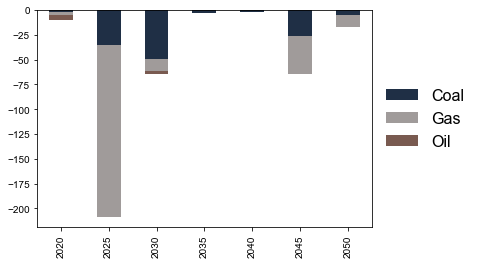

In [14]:
mpl.rcParams['font.family'] = 'Arial'
p_2040l.plot(kind='bar', stacked=True, cmap= fossil)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=16)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


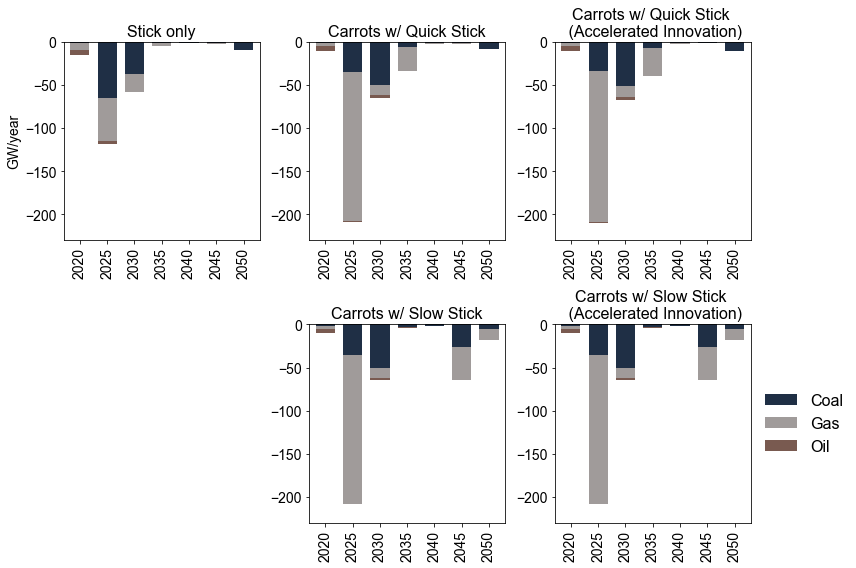

In [ ]:

mpl.rcParams['font.family'] = 'Arial'

fig, axs = plt.subplots(2, 3, figsize=(12, 8), gridspec_kw={'width_ratios': [1, 1, 1], 'height_ratios': [1, 1]})


axs[1, 0].axis('off')

p_s.plot(kind='bar', stacked=True, ax=axs[0, 0], cmap=fossil, width=0.7)
p_2030nl.plot(kind='bar', stacked=True, ax=axs[0, 1], cmap=fossil, width=0.7)
p_2030l.plot(kind='bar', stacked=True, ax=axs[0, 2], cmap=fossil, width=0.7)
p_2040nl.plot(kind='bar', stacked=True, ax=axs[1, 1], cmap=fossil, width=0.7)
p_2040l.plot(kind='bar', stacked=True, ax=axs[1, 2], cmap=fossil, width=0.7)

for ax in axs.flat:
    ax.legend().remove()
#     ax.set_ylim(-150, 0)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_ylim(-230,0)


axs[0, 0].set_title('Stick only', fontsize=16)
axs[0, 0].set_ylabel('GW/year', fontsize=14)

axs[0, 1].set_title('Carrots w/ Quick Stick', fontsize=16)
axs[0, 2].set_title('Carrots w/ Quick Stick \n (Accelerated Innovation)', fontsize=16)
axs[1, 1].set_title('Carrots w/ Slow Stick', fontsize=16)
axs[1, 2].set_title('Carrots w/ Slow Stick \n (Accelerated Innovation)', fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=16)

plt.tight_layout()

plt.show()
